<a href="https://colab.research.google.com/github/Rullyro/AIDepartmen1/blob/main/AI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# load dataset
col_names = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Class']
feature_cols = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/soildatanew.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,1,5.16,0.274,14.46,18.61,147,Tidak Optimal
1,2,6.07,0.355,14.59,32.74,180,Optimal
2,3,6.92,0.675,14.91,19.02,183,Optimal
3,4,7.70,0.355,4.21,6.28,116,Tidak Optimal
4,5,7.61,0.392,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...,...
776,777,6.72,0.454,7.66,20.67,395,Optimal
777,778,7.79,0.343,5.20,4.14,286,Tidak Optimal
778,779,7.63,1.135,17.13,6.90,582,Tidak Optimal
779,780,7.73,0.393,3.92,7.93,335,Tidak Optimal


In [ ]:
# Konversi EC
df['EC mS/cm']=df['EC mS/cm']*1000
df['EC mS/cm'].describe()

count     781.000000
mean      452.792574
std       304.840569
min       134.000000
25%       338.000000
50%       404.000000
75%       497.000000
max      5621.000000
Name: EC mS/cm, dtype: float64

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
df

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,5.16,274.0,14.46,18.61,147,Tidak Optimal
1,6.07,355.0,14.59,32.74,180,Optimal
2,6.92,675.0,14.91,19.02,183,Optimal
3,7.70,355.0,4.21,6.28,116,Tidak Optimal
4,7.61,392.0,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...
776,6.72,454.0,7.66,20.67,395,Optimal
777,7.79,343.0,5.20,4.14,286,Tidak Optimal
778,7.63,1135.0,17.13,6.90,582,Tidak Optimal
779,7.73,393.0,3.92,7.93,335,Tidak Optimal


In [ ]:
X = df.iloc[:,0:5] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [ ]:
X

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm
0,5.16,274.0,14.46,18.61,147
1,6.07,355.0,14.59,32.74,180
2,6.92,675.0,14.91,19.02,183
3,7.70,355.0,4.21,6.28,116
4,7.61,392.0,6.11,6.55,228
...,...,...,...,...,...
776,6.72,454.0,7.66,20.67,395
777,7.79,343.0,5.20,4.14,286
778,7.63,1135.0,17.13,6.90,582
779,7.73,393.0,3.92,7.93,335


In [ ]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))
X_Normalize = pd.DataFrame(data=sc.fit_transform(X),columns=feature_cols)

In [ ]:
# Gabung data yg telah di normalisasi dg classnya
data1 = pd.merge(X_Normalize, Y, left_index=True, right_index=True)

In [ ]:
data1

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,0.180593,0.025515,0.118546,0.115890,0.070991,Tidak Optimal
1,0.425876,0.040277,0.119625,0.209250,0.091187,Optimal
2,0.654987,0.098597,0.122281,0.118599,0.093023,Optimal
3,0.865229,0.040277,0.033455,0.034424,0.052020,Tidak Optimal
4,0.840970,0.047020,0.049228,0.036207,0.120563,Tidak Optimal
...,...,...,...,...,...,...
776,0.601078,0.058320,0.062095,0.129501,0.222766,Optimal
777,0.889488,0.038090,0.041674,0.020284,0.156059,Tidak Optimal
778,0.846361,0.182431,0.140711,0.038520,0.337209,Tidak Optimal
779,0.873315,0.047202,0.031048,0.045325,0.186047,Tidak Optimal


In [ ]:
#Split data optimal dan Tidak Optimal
data_optimal = data1[data1['Class'] == 'Optimal']
data_tidak_optimal = data1[data1['Class'] == 'Tidak Optimal']

In [ ]:
data_tidak_optimal

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,0.180593,0.025515,0.118546,0.115890,0.070991,Tidak Optimal
3,0.865229,0.040277,0.033455,0.034424,0.052020,Tidak Optimal
4,0.840970,0.047020,0.049228,0.036207,0.120563,Tidak Optimal
7,0.326146,0.013851,0.038187,0.072877,0.146267,Tidak Optimal
13,0.889488,0.057226,0.033455,0.010572,0.044676,Tidak Optimal
...,...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650,Tidak Optimal
777,0.889488,0.038090,0.041674,0.020284,0.156059,Tidak Optimal
778,0.846361,0.182431,0.140711,0.038520,0.337209,Tidak Optimal
779,0.873315,0.047202,0.031048,0.045325,0.186047,Tidak Optimal


In [ ]:
df1 = pd.concat([data_optimal, data_tidak_optimal])
x1 = df1.drop(labels=['Class'], axis=1) #variabel fitur
y1= df1['Class'] #variabel kelas

In [ ]:
x1

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm
1,0.425876,0.040277,0.119625,0.209250,0.091187
2,0.654987,0.098597,0.122281,0.118599,0.093023
5,0.541779,0.039184,0.048481,0.087479,0.122399
6,0.533693,0.153271,0.293707,0.088404,0.093023
8,0.423181,0.024057,0.027644,0.059134,0.109547
...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650
777,0.889488,0.038090,0.041674,0.020284,0.156059
778,0.846361,0.182431,0.140711,0.038520,0.337209
779,0.873315,0.047202,0.031048,0.045325,0.186047


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=0, stratify=y1)

In [ ]:
y_test

82     Tidak Optimal
83           Optimal
367    Tidak Optimal
666          Optimal
124          Optimal
           ...      
744    Tidak Optimal
467    Tidak Optimal
420          Optimal
545    Tidak Optimal
740          Optimal
Name: Class, Length: 196, dtype: object

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


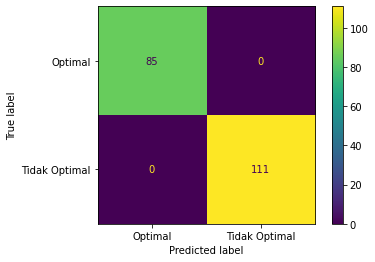

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  


Akurasi dengan menggunakan Decision Tree:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


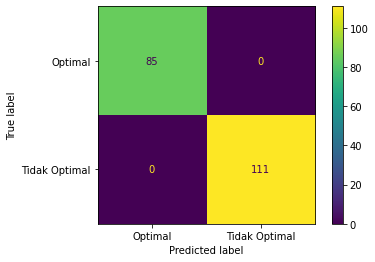

               precision    recall  f1-score   support

      Optimal       1.00      1.00      1.00        85
Tidak Optimal       1.00      1.00      1.00       111

     accuracy                           1.00       196
    macro avg       1.00      1.00      1.00       196
 weighted avg       1.00      1.00      1.00       196



In [ ]:
# Decision Tree dengan maximal kedalaman adalah 1 dan minimal jumlah sampel untuk dibentuk leaf baru adalah 2
dt = DecisionTreeClassifier(
  max_depth = 3,
  min_samples_split = 2
) #random_state=0, max_depth=2.  (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pH         781 non-null    float64
 1   EC mS/cm   781 non-null    float64
 2   N_NO3 ppm  781 non-null    float64
 3   P ppm      781 non-null    float64
 4   K ppm      781 non-null    int64  
 5   Class      781 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 36.7 KB


In [ ]:
df['Class']

0      1
1      0
2      0
3      1
4      1
      ..
776    0
777    1
778    1
779    1
780    1
Name: Class, Length: 781, dtype: int64

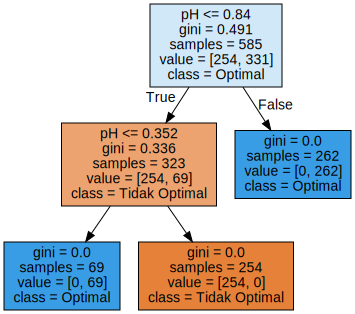

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm'],  
                      class_names=df['Class'],  
                      filled=True)  
graph = graphviz.Source(dot_data)  
graph 


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
report = classification_report(y_train, y_pred)

print(report)
knn.score(X_test, y_test)



               precision    recall  f1-score   support

      Optimal       0.96      0.96      0.96       254
Tidak Optimal       0.97      0.97      0.97       331

     accuracy                           0.97       585
    macro avg       0.97      0.97      0.97       585
 weighted avg       0.97      0.97      0.97       585



0.9183673469387755

ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Learning ANN

Akurasi dengan menggunakan Nearest Neighbor:  0.9897959183673469


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


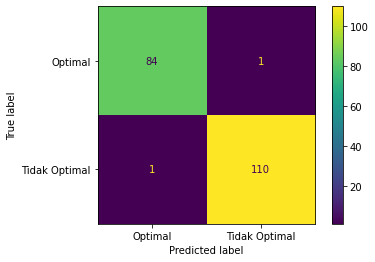

               precision    recall  f1-score   support

      Optimal       0.99      0.99      0.99        85
Tidak Optimal       0.99      0.99      0.99       111

     accuracy                           0.99       196
    macro avg       0.99      0.99      0.99       196
 weighted avg       0.99      0.99      0.99       196



In [ ]:

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

#akurasi
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df1['Class'] = labelencoder.fit_transform(df1['Class'])

In [ ]:
X = df1.iloc[:,1:5]
y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
y

1      1
2      0
5      0
6      1
8      1
      ..
775    0
777    1
778    1
779    1
780    1
Name: Class, Length: 781, dtype: int64

ANN KERAS

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, train_labels,epochs=64,batch_size=5)
model.summary()


Epoch 1/64
125/125 [==============================] - 1s 5ms/step - loss: 0.6892 - acc: 0.5657
Epoch 2/64
125/125 [==============================] - 1s 8ms/step - loss: 0.6865 - acc: 0.5657
Epoch 3/64
125/125 [==============================] - 1s 8ms/step - loss: 0.6854 - acc: 0.5657
Epoch 4/64
125/125 [==============================] - 0s 4ms/step - loss: 0.6853 - acc: 0.5657
Epoch 5/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6841 - acc: 0.5657
Epoch 6/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6835 - acc: 0.5657
Epoch 7/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6832 - acc: 0.5673
Epoch 8/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6823 - acc: 0.5689
Epoch 9/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6833 - acc: 0.5673
Epoch 10/64
125/125 [==============================] - 0s 3ms/step - loss: 0.6825 - acc: 0.5705
Epoch 11/64
125/125 [============================

In [ ]:
df1

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
1,0.425876,0.040277,0.119625,0.209250,0.091187,1
2,0.654987,0.098597,0.122281,0.118599,0.093023,0
5,0.541779,0.039184,0.048481,0.087479,0.122399,0
6,0.533693,0.153271,0.293707,0.088404,0.093023,1
8,0.423181,0.024057,0.027644,0.059134,0.109547,1
...,...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650,0
777,0.889488,0.038090,0.041674,0.020284,0.156059,1
778,0.846361,0.182431,0.140711,0.038520,0.337209,1
779,0.873315,0.047202,0.031048,0.045325,0.186047,1


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Text(0, 0.5, 'Class')

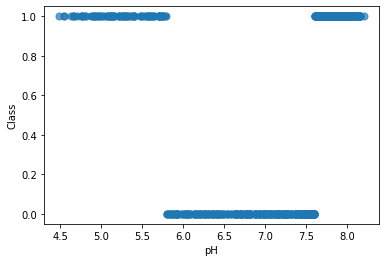

In [ ]:
x = df.iloc[:, 0]
y = df['Class']
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('pH')
plt.ylabel('Class')

In [ ]:
value = [6.92, 675, 14.91, 19.02, 183]
pred = clf.predict([value])
print(pred)

['Tidak Optimal']


In [ ]:
value = [0.42587601078167125, 0.04027701840714416, 0.11962477170845094, 0.20925008259002315, 0.09118727050183598]
pred = clf.predict([value])
print(pred)

['Optimal']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import numpy as np
value = [6.92, 675, 14.91, 19.02, 183]
np.array(value)

array([  6.92, 675.  ,  14.91,  19.02, 183.  ])

In [ ]:
sc.transform([value])
pred = clf.predict([value])
print(pred)

['Tidak Optimal']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
